In [1]:
# !pip install pystan~=2.14


In [2]:
# !pip install prophet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [4]:
data = pd.read_csv("/content/Data_w.csv")

In [5]:
data

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
0,200002,13,2320,200002,13,2320,1090234,5128575,TENNESSEE,47.0,...,13-FEB-00 23:20:00,EST,13-FEB-00 23:20:00,0,0,0,0,15K,18K,LAW ENFORCEMENT
1,200002,14,0,200002,14,0,1090241,5128582,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,20K,20K,LAW ENFORCEMENT
2,200002,14,0,200002,14,0,1090242,5128583,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,21K,17K,LAW ENFORCEMENT
3,200002,14,5,200002,14,5,1090244,5128585,TENNESSEE,47.0,...,14-FEB-00 00:05:00,EST,14-FEB-00 00:05:00,0,0,0,0,15K,15K,LAW ENFORCEMENT
4,200002,14,0,200002,14,0,1090245,5128586,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,20K,14K,LAW ENFORCEMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901906,202401,9,1900,202401,10,1300,187043,1148014,KENTUCKY,21.0,...,09-JAN-24 19:00:00,EST-5,10-JAN-24 13:00:00,0,0,0,0,0.50K,0.00K,Mesonet
901907,202401,9,2000,202401,10,0,186882,1147138,VERMONT,50.0,...,09-JAN-24 20:00:00,EST-5,10-JAN-24 00:00:00,0,0,0,0,0.00K,0.00K,CoCoRaHS
901908,202401,9,800,202401,12,500,187805,1153376,WYOMING,56.0,...,09-JAN-24 08:00:00,MST-7,12-JAN-24 05:00:00,0,0,0,0,0.00K,0.00K,SNOTEL
901909,202401,15,1600,202401,15,2000,187369,1149978,FLORIDA,12.0,...,15-JAN-24 16:00:00,EST-5,15-JAN-24 20:00:00,0,0,0,0,500.00K,0.00K,County Official


In [6]:
data.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE
0,200002,13,2320,200002,13,2320,1090234,5128575,TENNESSEE,47.0,...,13-FEB-00 23:20:00,EST,13-FEB-00 23:20:00,0,0,0,0,15K,18K,LAW ENFORCEMENT
1,200002,14,0,200002,14,0,1090241,5128582,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,20K,20K,LAW ENFORCEMENT
2,200002,14,0,200002,14,0,1090242,5128583,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,21K,17K,LAW ENFORCEMENT
3,200002,14,5,200002,14,5,1090244,5128585,TENNESSEE,47.0,...,14-FEB-00 00:05:00,EST,14-FEB-00 00:05:00,0,0,0,0,15K,15K,LAW ENFORCEMENT
4,200002,14,0,200002,14,0,1090245,5128586,TENNESSEE,47.0,...,14-FEB-00 00:00:00,EST,14-FEB-00 00:00:00,0,0,0,0,20K,14K,LAW ENFORCEMENT


In [7]:
data.shape

(901911, 27)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901911 entries, 0 to 901910
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BEGIN_YEARMONTH    901911 non-null  int64  
 1   BEGIN_DAY          901911 non-null  int64  
 2   BEGIN_TIME         901911 non-null  int64  
 3   END_YEARMONTH      901911 non-null  int64  
 4   END_DAY            901911 non-null  int64  
 5   END_TIME           901911 non-null  int64  
 6   EPISODE_ID         901911 non-null  int64  
 7   EVENT_ID           901911 non-null  int64  
 8   STATE              901911 non-null  object 
 9   STATE_FIPS         901911 non-null  float64
 10  YEAR               901911 non-null  int64  
 11  MONTH_NAME         901911 non-null  object 
 12  EVENT_TYPE         901911 non-null  object 
 13  CZ_TYPE            901911 non-null  object 
 14  CZ_FIPS            901911 non-null  int64  
 15  CZ_NAME            901911 non-null  object 
 16  WF

In [9]:
data.isnull().sum()

BEGIN_YEARMONTH      0
BEGIN_DAY            0
BEGIN_TIME           0
END_YEARMONTH        0
END_DAY              0
END_TIME             0
EPISODE_ID           0
EVENT_ID             0
STATE                0
STATE_FIPS           0
YEAR                 0
MONTH_NAME           0
EVENT_TYPE           0
CZ_TYPE              0
CZ_FIPS              0
CZ_NAME              0
WFO                  0
BEGIN_DATE_TIME      0
CZ_TIMEZONE          0
END_DATE_TIME        0
INJURIES_DIRECT      0
INJURIES_INDIRECT    0
DEATHS_DIRECT        0
DEATHS_INDIRECT      0
DAMAGE_PROPERTY      0
DAMAGE_CROPS         0
SOURCE               0
dtype: int64

In [10]:
data.isnull().sum() * 100 / len(data)

BEGIN_YEARMONTH      0.0
BEGIN_DAY            0.0
BEGIN_TIME           0.0
END_YEARMONTH        0.0
END_DAY              0.0
END_TIME             0.0
EPISODE_ID           0.0
EVENT_ID             0.0
STATE                0.0
STATE_FIPS           0.0
YEAR                 0.0
MONTH_NAME           0.0
EVENT_TYPE           0.0
CZ_TYPE              0.0
CZ_FIPS              0.0
CZ_NAME              0.0
WFO                  0.0
BEGIN_DATE_TIME      0.0
CZ_TIMEZONE          0.0
END_DATE_TIME        0.0
INJURIES_DIRECT      0.0
INJURIES_INDIRECT    0.0
DEATHS_DIRECT        0.0
DEATHS_INDIRECT      0.0
DAMAGE_PROPERTY      0.0
DAMAGE_CROPS         0.0
SOURCE               0.0
dtype: float64

In [11]:
df = data[['EVENT_ID','BEGIN_DATE_TIME','EVENT_TYPE','STATE']]

In [12]:
df.head()

,EVENT_ID,BEGIN_DATE_TIME,EVENT_TYPE,STATE
0,5128575,13-FEB-00 23:20:00,Thunderstorm Wind,TENNESSEE
1,5128582,14-FEB-00 00:00:00,Thunderstorm Wind,TENNESSEE
2,5128583,14-FEB-00 00:00:00,Thunderstorm Wind,TENNESSEE
3,5128585,14-FEB-00 00:05:00,Thunderstorm Wind,TENNESSEE
4,5128586,14-FEB-00 00:00:00,Thunderstorm Wind,TENNESSEE


In [13]:
df.BEGIN_DATE_TIME = pd.to_datetime(df.BEGIN_DATE_TIME, format = '%d-%b-%y %H:%M:%S')

<ipython-input-13-68034755f766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BEGIN_DATE_TIME = pd.to_datetime(df.BEGIN_DATE_TIME, format = '%d-%b-%y %H:%M:%S')


In [14]:
df.isnull().sum()

EVENT_ID           0
BEGIN_DATE_TIME    0
EVENT_TYPE         0
STATE              0
dtype: int64

In [15]:
df.isnull().sum() * 100 / len(data)

EVENT_ID           0.0
BEGIN_DATE_TIME    0.0
EVENT_TYPE         0.0
STATE              0.0
dtype: float64

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901911 entries, 0 to 901910
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   EVENT_ID         901911 non-null  int64         
 1   BEGIN_DATE_TIME  901911 non-null  datetime64[ns]
 2   EVENT_TYPE       901911 non-null  object        
 3   STATE            901911 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.5+ MB


In [18]:
df['EVENT_TYPE'].value_counts().head(10)

EVENT_TYPE
Thunderstorm Wind           220339
Hail                        146247
Flash Flood                  67981
Winter Weather               50360
High Wind                    49374
Flood                        45439
Winter Storm                 45239
Drought                      37423
Heavy Snow                   34338
Marine Thunderstorm Wind     24378
Name: count, dtype: int64

In [19]:
df['STATE'].value_counts().head(10)

STATE
TEXAS           73560
IOWA            37051
ILLINOIS        34076
MISSOURI        33165
NEBRASKA        29370
KENTUCKY        28892
KANSAS          26177
OKLAHOMA        25501
PENNSYLVANIA    24701
CALIFORNIA      24636
Name: count, dtype: int64

In [20]:
df.index = pd.DatetimeIndex(df.BEGIN_DATE_TIME)


In [21]:
df

,EVENT_ID,BEGIN_DATE_TIME,EVENT_TYPE,STATE
BEGIN_DATE_TIME,,,,
2000-02-13 23:20:00,5128575,2000-02-13 23:20:00,Thunderstorm Wind,TENNESSEE
2000-02-14 00:00:00,5128582,2000-02-14 00:00:00,Thunderstorm Wind,TENNESSEE
2000-02-14 00:00:00,5128583,2000-02-14 00:00:00,Thunderstorm Wind,TENNESSEE
2000-02-14 00:05:00,5128585,2000-02-14 00:05:00,Thunderstorm Wind,TENNESSEE
2000-02-14 00:00:00,5128586,2000-02-14 00:00:00,Thunderstorm Wind,TENNESSEE
...,...,...,...,...
2024-01-09 19:00:00,1148014,2024-01-09 19:00:00,Strong Wind,KENTUCKY
2024-01-09 20:00:00,1147138,2024-01-09 20:00:00,Winter Weather,VERMONT
2024-01-09 08:00:00,1153376,2024-01-09 08:00:00,Winter Storm,WYOMING


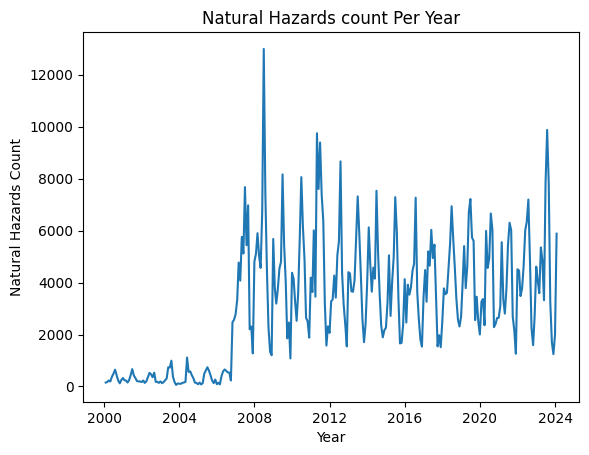

In [22]:
plt.plot(df.resample('M').size())
plt.title('Natural Hazards count Per Year')
plt.xlabel('Year')
plt.ylabel('Natural Hazards Count')
plt.show()

In [23]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [24]:
df_prophet.columns = ['BEGIN_DATE_TIME', 'Natural_Hazards_Count']

In [25]:
df_prophet

,BEGIN_DATE_TIME,Natural_Hazards_Count
0,2000-01-31,151
1,2000-02-29,170
2,2000-03-31,230
3,2000-04-30,194
4,2000-05-31,373
...,...,...
284,2023-09-30,3241
285,2023-10-31,1704
286,2023-11-30,1242
287,2023-12-31,1992


In [26]:
df_prophet = df_prophet.rename(columns= {'BEGIN_DATE_TIME':'ds','Natural_Hazards_Count':'y'})

# Traning The Model

In [27]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprulevupb/tfxdnjie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprulevupb/3f9ojpkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79073', 'data', 'file=/tmp/tmprulevupb/tfxdnjie.json', 'init=/tmp/tmprulevupb/3f9ojpkr.json', 'output', 'file=/tmp/tmprulevupb/prophet_modeljj1lq2ns/prophet_model-20240427192705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Making Predictions

In [28]:
pred = m.make_future_dataframe(periods = 24, freq = 'M')
forecast = m.predict(pred)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-31,-716.383347,-2569.541203,930.539151,-716.383347,-716.383347,-79.237259,-79.237259,-79.237259,-79.237259,-79.237259,-79.237259,0.0,0.0,0.0,-795.620607
1,2000-02-29,-678.816910,-2478.125364,1013.917839,-678.816910,-678.816910,-43.590717,-43.590717,-43.590717,-43.590717,-43.590717,-43.590717,0.0,0.0,0.0,-722.407627
2,2000-03-31,-638.659684,-2744.968577,772.270273,-638.659684,-638.659684,-155.532985,-155.532985,-155.532985,-155.532985,-155.532985,-155.532985,0.0,0.0,0.0,-794.192668
3,2000-04-30,-599.797852,-2122.884721,1321.021820,-599.797852,-599.797852,275.476233,275.476233,275.476233,275.476233,275.476233,275.476233,0.0,0.0,0.0,-324.321619
4,2000-05-31,-559.640626,-1217.863928,2126.633982,-559.640626,-559.640626,970.269432,970.269432,970.269432,970.269432,970.269432,970.269432,0.0,0.0,0.0,410.628806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2025-09-30,4271.266096,1240.927439,4745.329338,4233.976980,4308.832743,-1278.646817,-1278.646817,-1278.646817,-1278.646817,-1278.646817,-1278.646817,0.0,0.0,0.0,2992.619279
309,2025-10-31,4272.311958,1025.914368,4404.988121,4231.307819,4313.026723,-1546.120429,-1546.120429,-1546.120429,-1546.120429,-1546.120429,-1546.120429,0.0,0.0,0.0,2726.191529
310,2025-11-30,4273.324082,726.765654,4532.781510,4229.559706,4318.084298,-1717.210937,-1717.210937,-1717.210937,-1717.210937,-1717.210937,-1717.210937,0.0,0.0,0.0,2556.113145
311,2025-12-31,4274.369944,1954.729129,5576.000981,4228.074529,4322.502281,-488.462567,-488.462567,-488.462567,-488.462567,-488.462567,-488.462567,0.0,0.0,0.0,3785.907377


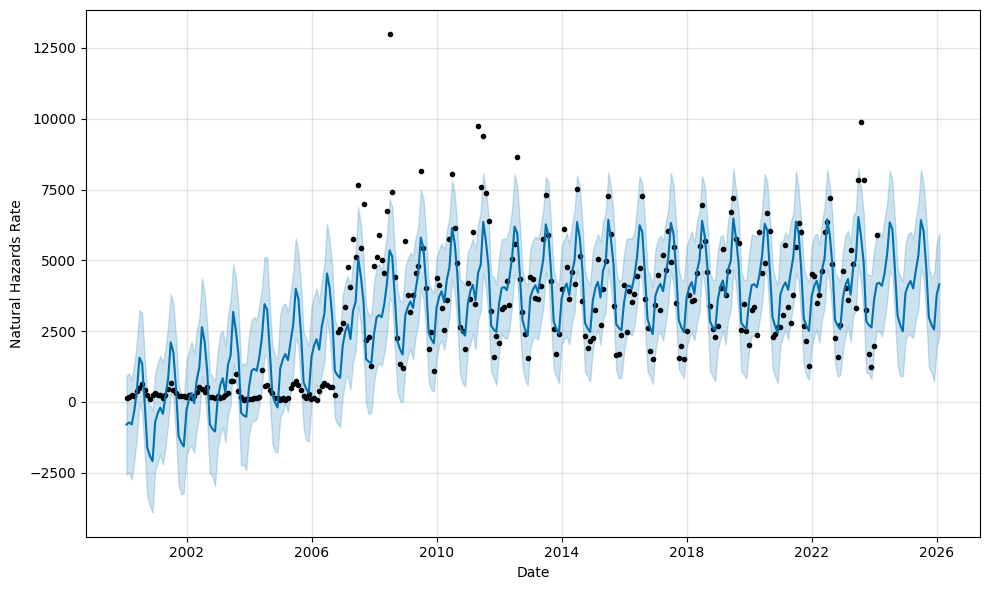

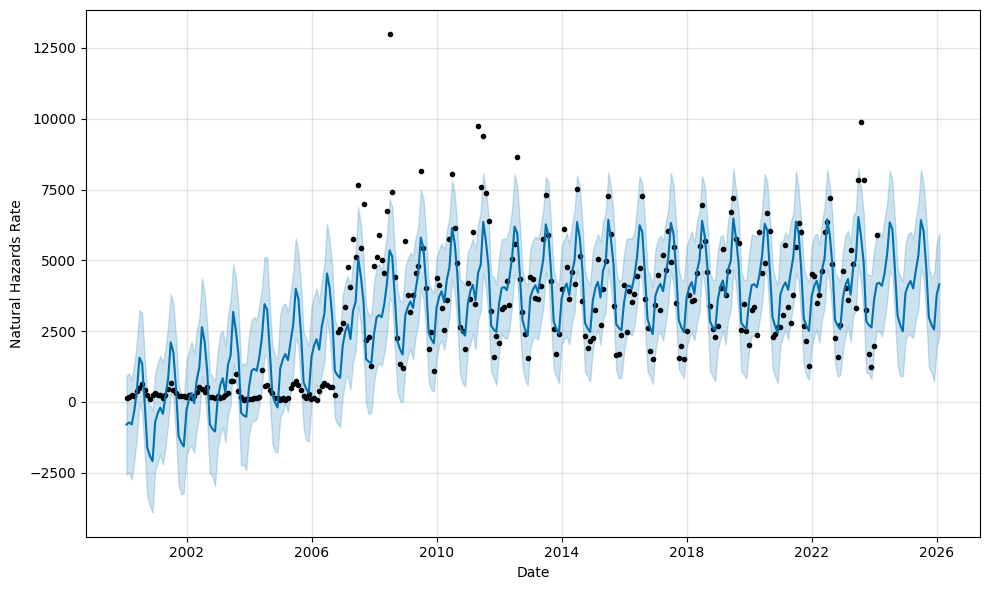

In [30]:
m.plot(forecast, xlabel = 'Date', ylabel = 'Natural Hazards Rate')

In [31]:
# x = int(input('Enter the number of months to Forecast: '))
x = 120

In [32]:
pred = m.make_future_dataframe(periods = x, freq = 'M')
forecast = m.predict(pred)

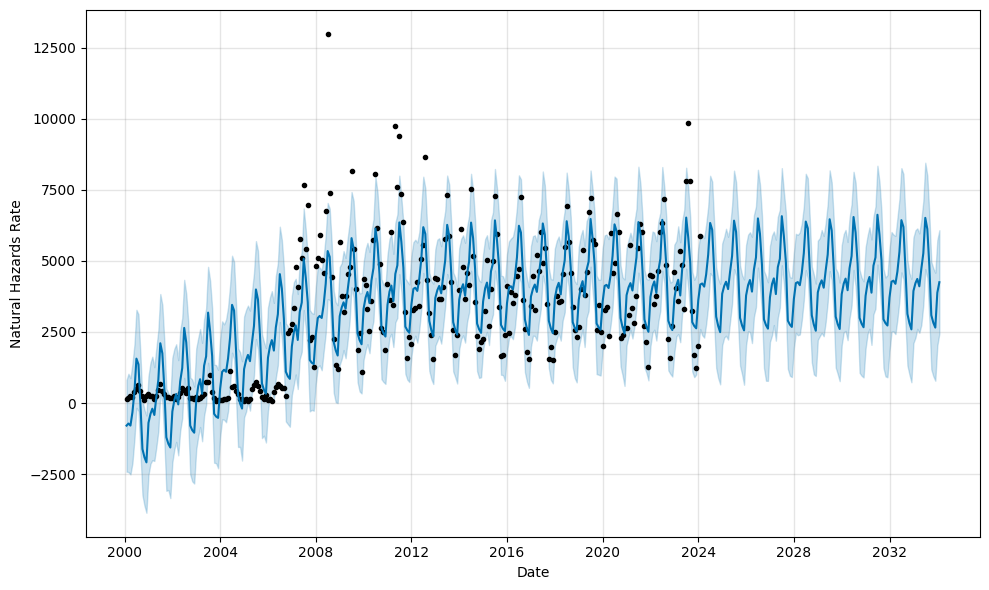

In [33]:
fig1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Natural Hazards Rate')

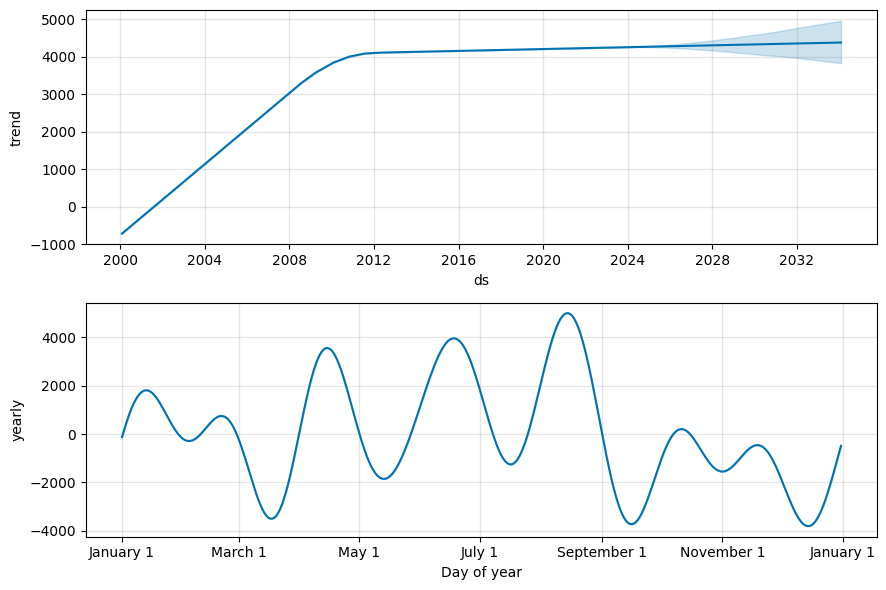

In [34]:
fig2 = m.plot_components(forecast)

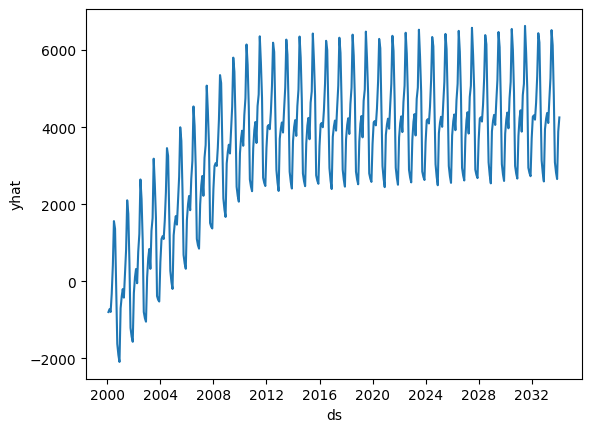

In [35]:
import seaborn as sns

# Assuming you have forecast data with a 'ds' (date) column and a 'yhat' (predicted value) column
sns.lineplot(x='ds', y='yhat', data=forecast)
plt.show()

In [36]:
df['STATE'].unique()


array(['TENNESSEE', 'COLORADO', 'ALABAMA', 'FLORIDA', 'KENTUCKY', 'TEXAS',
       'PUERTO RICO', 'GEORGIA', 'CALIFORNIA', 'SOUTH CAROLINA',
       'NORTH CAROLINA', 'NEBRASKA', 'WASHINGTON', 'MISSOURI', 'ARKANSAS',
       'IOWA', 'WISCONSIN', 'ILLINOIS', 'MINNESOTA', 'OHIO',
       'PENNSYLVANIA', 'NEW JERSEY', 'OKLAHOMA', 'MARYLAND', 'NEW YORK',
       'NORTH DAKOTA', 'MONTANA', 'KANSAS', 'ARIZONA', 'VIRGINIA',
       'MICHIGAN', 'OREGON', 'INDIANA', 'SOUTH DAKOTA', 'GUAM',
       'DELAWARE', 'UTAH', 'IDAHO', 'ALASKA', 'AMERICAN SAMOA',
       'LOUISIANA', 'NEW MEXICO', 'GULF OF MEXICO', 'WYOMING',
       'ATLANTIC SOUTH', 'HAWAII', 'ATLANTIC NORTH', 'NEVADA',
       'WEST VIRGINIA', 'NEW HAMPSHIRE', 'MAINE', 'MISSISSIPPI',
       'VERMONT', 'CONNECTICUT', 'MASSACHUSETTS', 'HAWAII WATERS',
       'DISTRICT OF COLUMBIA', 'LAKE MICHIGAN', 'VIRGIN ISLANDS',
       'E PACIFIC', 'LAKE HURON', 'RHODE ISLAND', 'LAKE ERIE',
       'LAKE ONTARIO', 'LAKE SUPERIOR', 'LAKE ST CLAIR', 'GULF OF ALA

In [37]:
data['YEAR'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])